In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from sklearn import tree

df = pd.read_csv('vgsales.csv')
df = df.dropna()
df.loc[[0,1]]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [4]:
#here we get the dataframe with the features(Global_Sales, Year) and the target(Name)
X = df[['Global_Sales', 'Year']]
y = df['Name']

#here we split the data into training(80%) and testing data(20%)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2)

#here we create the model and train it
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#here we make a list of all years from min to max and keep the Global_Sales at 10M
l=[]
for i in range(int(df['Year'].min()), int(df['Year'].max()+1)):
    l.append([10,i])

#here we predict the name of the game for each year
#predictions = model.predict(l)

#here we print the prediction for each year and the name of the game
#for i in range(len(l)):
    #print(l[i][1], predictions[i])

#here we test the model accuracy using 20% of answers
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)


In [4]:
X = df[['Global_Sales', 'Year']]
y = df['Name']

#trains the model using all the data
model = DecisionTreeClassifier()
model.fit(X, y)

# saves the model to a file
joblib.dump(model, 'model.joblib')

['model.joblib']

In [6]:
tree.export_graphviz(model, out_file='tree.dot', feature_names=['Global_Sales', 'Year'], class_names=sorted(y.unique()),label='all', rounded=True, filled=True)

In [7]:
model = joblib.load('model.joblib')

#here we print the prediction for each year and the name of the game
predictions = model.predict(l)
for i in range(len(l)):
    print(l[i][1], predictions[i])

1980 Pac-Man
1981 Pac-Man
1982 Pac-Man
1983 Pac-Man
1984 The Legend of Zelda
1985 The Legend of Zelda
1986 The Legend of Zelda
1987 The Legend of Zelda
1988 Super Mario Bros. 2
1989 Super Mario Land
1990 Super Mario World
1991 Super Mario World
1992 Super Mario Land 2: 6 Golden Coins
1993 Super Mario All-Stars
1994 Donkey Kong Country
1995 Donkey Kong Country 2: Diddy's Kong Quest
1996 Mario Kart 64
1997 Final Fantasy VII
1998 The Legend of Zelda: Ocarina of Time
1999 Gran Turismo 2
2000 Pokémon Crystal Version
2001 Final Fantasy X
2002 Medal of Honor: Frontline
2003 Need for Speed Underground
2004 Super Mario 64
2005 Animal Crossing: Wild World
2006 The Legend of Zelda: Twilight Princess
2007 Call of Duty 4: Modern Warfare
2008 Grand Theft Auto IV
2009 Call of Duty: Modern Warfare 2
2010 Halo: Reach
2011 Just Dance 3
2012 New Super Mario Bros. 2
2013 Call of Duty: Ghosts
2014 Pokemon Omega Ruby/Pokemon Alpha Sapphire
2015 FIFA 16
2016 FIFA 17
2017 FIFA 17
2018 FIFA 17
2019 FIFA 17
202

c:\Users\jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
for i in df.duplicated():
    if i:
        print("found one", i)
        df.drop_duplicates(inplace = True)
df.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178027,-0.400315,-0.379137,-0.269323,-0.332735,-0.426975
Year,0.178027,1.000000,-0.091285,0.006108,-0.169387,0.041128,-0.074647
NA_Sales,-0.400315,-0.091285,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,-0.379137,0.006108,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.269323,-0.169387,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,-0.332735,0.041128,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,-0.426975,-0.074647,0.941269,0.903264,0.612774,0.747964,1.000000


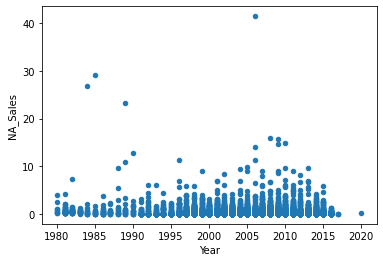

In [ ]:
import matplotlib.pyplot as plt
df.plot(x = 'Year', y = 'NA_Sales', kind = 'scatter')

plt.show()